# Modeling

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import shap
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Train Set): %.2f" % model.score(xtrain, ytrain))
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("\nPrecision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))

    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1)
    print("AUC: %.2f" % auc(fpr, tpr))
    
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

## Modeling Experiment 1: Without Standardization

### Logistic Regression

In [23]:
model_lr = LogisticRegression(max_iter=1000, random_state=0)

scores = cross_val_score(model_lr, X_train, y_train, scoring = 'roc_auc', cv = cv)
scores.mean()

0.7599270833333333

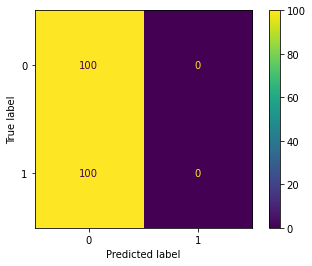

In [24]:
model_lr.fit(X_train, y_train)

y_pred_val = model_lr.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [22]:
eval_classification(model_lr, y_pred_val, X_train, y_train, X_val, y_val)

Accuracy (Train Set): 0.50
Accuracy (Test Set): 0.50

Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC: 0.50


#### Hyperparameter Tuning

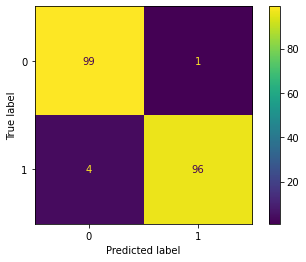

In [46]:
hyperparameters = dict(penalty = ['l2','l1','elasticnet','none'],
                       C = [0.0001, 0.001, 0.002],
                       solver=['newton-cg', 'lbfgs','liblinear', 'sag', 'saga'])

model_lr_tuned = RandomizedSearchCV(model_lr, hyperparameters, cv=cv, random_state=0, scoring='roc_auc')
model_lr_tuned.fit(X_train, y_train)

y_pred_val = model_lr_tuned.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [47]:
eval_classification(model_lr_tuned, y_pred_val, X_train, y_train, X_val, y_val)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.97

Precision (Test Set): 0.99
Recall (Test Set): 0.96
F1-Score (Test Set): 0.97
AUC: 0.97


In [48]:
model_lr_tuned.best_estimator_.get_params()

{'C': 0.002,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Decision Tree

In [29]:
model_dt = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(model_dt, X_train, y_train, cv=cv, scoring='roc_auc')
scores.mean()

0.9320833333333333

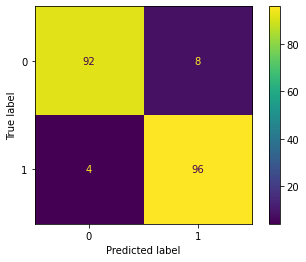

In [30]:
model_dt.fit(X_train, y_train)

y_pred_val = model_dt.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [31]:
eval_classification(model_dt, y_pred_val, X_train, y_train, X_val, y_val)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.94

Precision (Test Set): 0.92
Recall (Test Set): 0.96
F1-Score (Test Set): 0.94
AUC: 0.94


#### Hyperparameter Tuning

Wall time: 718 ms


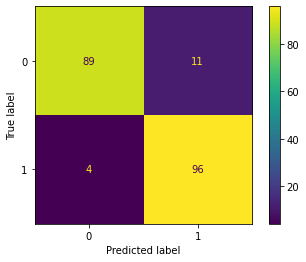

In [50]:
%%time
hyperparameters = dict(max_depth=[3,4,5], 
                       min_samples_split=[10, 20,30, 40, 50, 75, 100], 
                       min_samples_leaf=[10, 20,30, 40, 50],
                       max_features=['auto', 'sqrt'],
                       criterion = ['gini','entropy'])

model_dt_tuned = RandomizedSearchCV(model_dt, hyperparameters, cv=cv, random_state=0, scoring='roc_auc')
model_dt_tuned.fit(X_train, y_train)

y_pred_val = model_dt_tuned.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [51]:
eval_classification(model_dt_tuned, y_pred_val, X_train, y_train, X_val, y_val)

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.93

Precision (Test Set): 0.90
Recall (Test Set): 0.96
F1-Score (Test Set): 0.93
AUC: 0.92


In [52]:
model_dt_tuned.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 30,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

### Random Forest

In [41]:
model_rf = RandomForestClassifier(random_state=0)
scores = cross_val_score(model_dt, X_train, y_train, cv=cv, scoring='roc_auc')
scores.mean()

0.9320833333333333

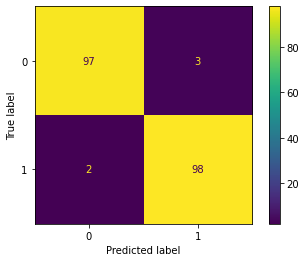

In [42]:
model_rf.fit(X_train, y_train)

y_pred_val = model_rf.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [43]:
eval_classification(model_rf, y_pred_val, X_train, y_train, X_val, y_val)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.97

Precision (Test Set): 0.97
Recall (Test Set): 0.98
F1-Score (Test Set): 0.98
AUC: 0.97


#### Hyperparameter Tuning

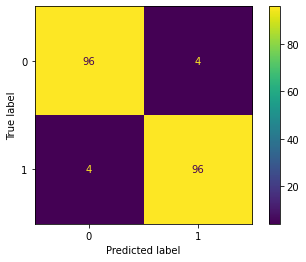

In [53]:
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 4)],
                       bootstrap = [True],
                       criterion = ['gini','entropy'],
                       max_depth = [3],
                       min_samples_split = [20,30, 40, 50, 75, 100],
                       min_samples_leaf = [10, 20, 30, 40, 50],
                       max_features = ['auto', 'sqrt', 'log2'],
                       n_jobs = [-1])

model_rf_tuned = RandomizedSearchCV(model_rf, hyperparameters, cv=cv, random_state=0, scoring='roc_auc')
model_rf_tuned.fit(X_train, y_train)

y_pred_val = model_rf_tuned.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [54]:
eval_classification(model_rf_tuned, y_pred_val, X_train, y_train, X_val, y_val)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.96

Precision (Test Set): 0.96
Recall (Test Set): 0.96
F1-Score (Test Set): 0.96
AUC: 0.96


In [55]:
model_rf_tuned.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 40,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 166,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

### KNN

In [37]:
model_knn = KNeighborsClassifier()
scores = cross_val_score(model_knn, X_train, y_train, cv=cv, scoring='roc_auc')
scores.mean()

0.7097604166666666

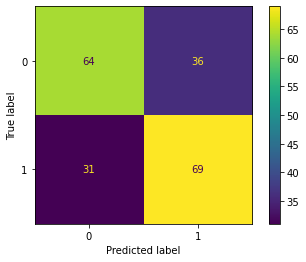

In [38]:
model_knn.fit(X_train, y_train)

y_pred_val = model_knn.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [39]:
eval_classification(model_knn, y_pred_val, X_train, y_train, X_val, y_val)

Accuracy (Train Set): 0.77
Accuracy (Test Set): 0.67

Precision (Test Set): 0.66
Recall (Test Set): 0.69
F1-Score (Test Set): 0.67
AUC: 0.66


#### Hyperparameter Tuning

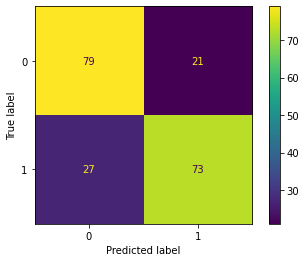

In [56]:
hyperparameters = dict(n_neighbors = list(range(25,36)),
                       p=[1,2],
                       algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'])

model_knn_tuned = RandomizedSearchCV(model_knn, hyperparameters, cv=cv, random_state=0, scoring='recall')
model_knn_tuned.fit(X_train, y_train)

y_pred_val = model_knn_tuned.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [57]:
eval_classification(model_knn_tuned, y_pred_val, X_train, y_train, X_val, y_val)

Accuracy (Train Set): 0.60
Accuracy (Test Set): 0.76

Precision (Test Set): 0.78
Recall (Test Set): 0.73
F1-Score (Test Set): 0.75
AUC: 0.76


In [58]:
model_knn_tuned.best_estimator_.get_params()

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 35,
 'p': 2,
 'weights': 'uniform'}

## Modeling Experiment 1: With Standardization

In [11]:
num_cols = ['Daily Time Spent on Site', 'Age', 'Area Income',
            'Daily Internet Usage']
cat_cols = ['Male','category:Bank',
       'category:Electronic', 'category:Fashion', 'category:Finance',
       'category:Food', 'category:Furniture', 'category:Health',
       'category:House', 'category:Otomotif', 'category:Travel', 'Month:Apr',
       'Month:Feb', 'Month:Jan', 'Month:Jul', 'Month:Jun', 'Month:Mar',
       'Month:May', 'Day_of_Week:Fri', 'Day_of_Week:Mon', 'Day_of_Week:Sat',
       'Day_of_Week:Sun', 'Day_of_Week:Thu', 'Day_of_Week:Tue',
       'Day_of_Week:Wed']

In [12]:
scaler = StandardScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), columns=num_cols).reset_index(drop=True)
X_val_sc = pd.DataFrame(scaler.transform(X_val[num_cols]), columns=num_cols).reset_index(drop=True)

In [13]:
X_train_sc = pd.concat([X_train_sc, X_train[cat_cols].reset_index(drop=True)], axis = 1)
X_val_sc = pd.concat([X_val_sc, X_val[cat_cols].reset_index(drop=True)], axis = 1)

In [96]:
X_train_sc.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,category:Bank,category:Electronic,category:Fashion,category:Finance,category:Food,category:Furniture,category:Health,category:House,category:Otomotif,category:Travel,Month:Apr,Month:Feb,Month:Jan,Month:Jul,Month:Jun,Month:Mar,Month:May,Day_of_Week:Fri,Day_of_Week:Mon,Day_of_Week:Sat,Day_of_Week:Sun,Day_of_Week:Thu,Day_of_Week:Tue,Day_of_Week:Wed
0,-1.00556,-0.475928,-1.081529,-1.37747,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


### Logistic Regression

In [14]:
model_lr_sc = LogisticRegression(max_iter=1000, random_state=0)

scores = cross_val_score(model_lr_sc, X_train_sc, y_train, scoring = 'roc_auc', cv = cv)
scores.mean()

0.99034375

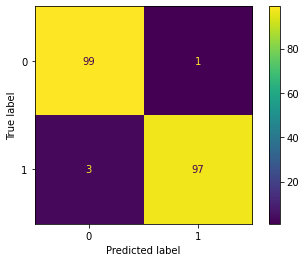

In [15]:
model_lr_sc.fit(X_train_sc, y_train)

y_pred_val = model_lr_sc.predict(X_val_sc)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [99]:
eval_classification(model_lr_sc, y_pred_val, X_train_sc, y_train, X_val_sc, y_val)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.98

Precision (Test Set): 0.99
Recall (Test Set): 0.97
F1-Score (Test Set): 0.98
AUC: 0.98


In [100]:
model_lr_sc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Hyperparameter Tuning

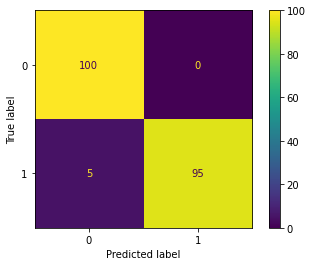

In [101]:
hyperparameters = dict(penalty = ['l2','l1','elasticnet','none'],
                       C = [0.0001, 0.001, 0.002],
                       solver=['newton-cg', 'lbfgs','liblinear', 'sag', 'saga'])

model_lr_sc_tuned = RandomizedSearchCV(model_lr_sc, hyperparameters, cv=cv, random_state=0, scoring='roc_auc')
model_lr_sc_tuned.fit(X_train_sc, y_train)

y_pred_val = model_lr_sc_tuned.predict(X_val_sc)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [102]:
eval_classification(model_lr_sc_tuned, y_pred_val, X_train_sc, y_train, X_val_sc, y_val)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.97

Precision (Test Set): 1.00
Recall (Test Set): 0.95
F1-Score (Test Set): 0.97
AUC: 0.97


In [103]:
model_lr_sc_tuned.best_estimator_.get_params()

{'C': 0.001,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Decision Tree

In [104]:
model_dt_sc = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(model_dt_sc, X_train_sc, y_train, cv=cv, scoring='roc_auc')
scores.mean()

0.9325

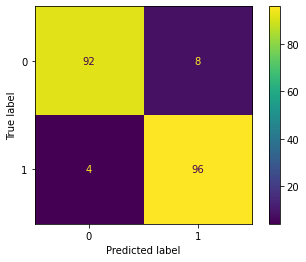

In [106]:
model_dt_sc.fit(X_train_sc, y_train)

y_pred_val = model_dt_sc.predict(X_val_sc)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [107]:
eval_classification(model_dt_sc, y_pred_val, X_train_sc, y_train, X_val_sc, y_val)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.94

Precision (Test Set): 0.92
Recall (Test Set): 0.96
F1-Score (Test Set): 0.94
AUC: 0.94


In [111]:
model_dt_sc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

#### Hyperparameter Tuning

Wall time: 661 ms


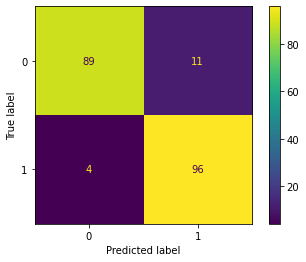

In [108]:
%%time
hyperparameters = dict(max_depth=[3,4,5], 
                       min_samples_split=[10, 20,30, 40, 50, 75, 100], 
                       min_samples_leaf=[10, 20,30, 40, 50],
                       max_features=['auto', 'sqrt'],
                       criterion = ['gini','entropy'])

model_dt_sc_tuned = RandomizedSearchCV(model_dt_sc, hyperparameters, cv=cv, random_state=0, scoring='roc_auc')
model_dt_sc_tuned.fit(X_train_sc, y_train)

y_pred_val = model_dt_sc_tuned.predict(X_val_sc)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [109]:
eval_classification(model_dt_sc_tuned, y_pred_val, X_train_sc, y_train, X_val_sc, y_val)

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.93

Precision (Test Set): 0.90
Recall (Test Set): 0.96
F1-Score (Test Set): 0.93
AUC: 0.92


In [110]:
model_dt_sc_tuned.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 30,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

### Random Forest

In [113]:
model_rf_sc = RandomForestClassifier(random_state=0)
scores = cross_val_score(model_rf_sc, X_train_sc, y_train, cv=cv, scoring='roc_auc')
scores.mean()

0.9891979166666668

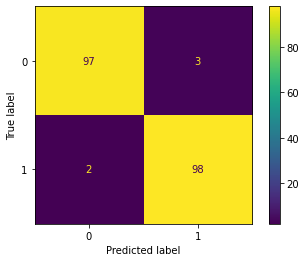

In [114]:
model_rf_sc.fit(X_train_sc, y_train)

y_pred_val = model_rf_sc.predict(X_val_sc)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [115]:
eval_classification(model_rf_sc, y_pred_val, X_train_sc, y_train, X_val_sc, y_val)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.97

Precision (Test Set): 0.97
Recall (Test Set): 0.98
F1-Score (Test Set): 0.98
AUC: 0.97


In [119]:
model_rf_sc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

#### Hyperparameter Tuning

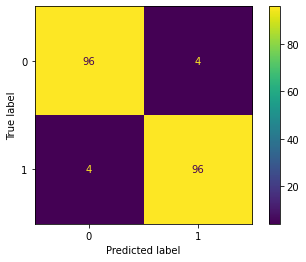

In [116]:
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 4)],
                       bootstrap = [True],
                       criterion = ['gini','entropy'],
                       max_depth = [3],
                       min_samples_split = [20,30, 40, 50, 75, 100],
                       min_samples_leaf = [10, 20, 30, 40, 50],
                       max_features = ['auto', 'sqrt', 'log2'],
                       n_jobs = [-1])

model_rf_sc_tuned = RandomizedSearchCV(model_rf_sc, hyperparameters, cv=cv, random_state=0, scoring='roc_auc')
model_rf_sc_tuned.fit(X_train_sc, y_train)

y_pred_val = model_rf_sc_tuned.predict(X_val_sc)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [117]:
eval_classification(model_rf_sc_tuned, y_pred_val, X_train_sc, y_train, X_val_sc, y_val)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.96

Precision (Test Set): 0.96
Recall (Test Set): 0.96
F1-Score (Test Set): 0.96
AUC: 0.96


In [118]:
model_rf_sc_tuned.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 40,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 166,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

### KNN

In [120]:
model_knn_sc = KNeighborsClassifier()
scores = cross_val_score(model_knn_sc, X_train_sc, y_train, cv=cv, scoring='roc_auc')
scores.mean()

0.9793749999999998

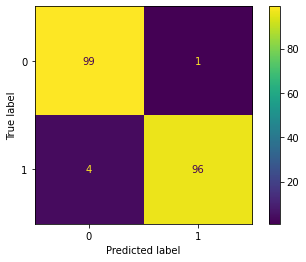

In [121]:
model_knn_sc.fit(X_train_sc, y_train)

y_pred_val = model_knn_sc.predict(X_val_sc)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [122]:
eval_classification(model_knn_sc, y_pred_val, X_train_sc, y_train, X_val_sc, y_val)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.97

Precision (Test Set): 0.99
Recall (Test Set): 0.96
F1-Score (Test Set): 0.97
AUC: 0.97


In [123]:
model_knn_sc.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### Hyperparameter Tuning

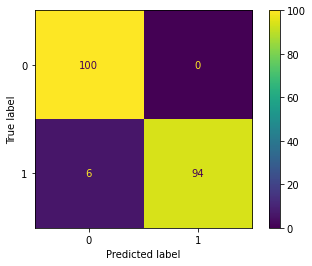

In [124]:
hyperparameters = dict(n_neighbors = list(range(25,36)),
                       p=[1,2],
                       algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'])

model_knn_sc_tuned = RandomizedSearchCV(model_knn_sc, hyperparameters, cv=cv, random_state=0, scoring='recall')
model_knn_sc_tuned.fit(X_train_sc, y_train)

y_pred_val = model_knn_sc_tuned.predict(X_val_sc)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [125]:
eval_classification(model_knn_sc_tuned, y_pred_val, X_train_sc, y_train, X_val_sc, y_val)

Accuracy (Train Set): 0.92
Accuracy (Test Set): 0.97

Precision (Test Set): 1.00
Recall (Test Set): 0.94
F1-Score (Test Set): 0.97
AUC: 0.97


In [126]:
model_knn_sc_tuned.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 31,
 'p': 2,
 'weights': 'uniform'}

## Selected Model

In [133]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [66]:
def show_feature_importance(model):
    feature_importances = pd.DataFrame({'feature':list(X_train_sc.columns), 
                                  'feature_importance':[abs(i) for i in model_lr_sc.coef_[0]]})
    feature_importances = feature_importances.sort_values('feature_importance', ascending=False)
    plt.figure(figsize=(7,5))
    sns.barplot(data=feature_importances.head(15), 
                x='feature_importance', 
                y='feature', 
                palette='gist_earth')
    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')
    sns.despine()

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

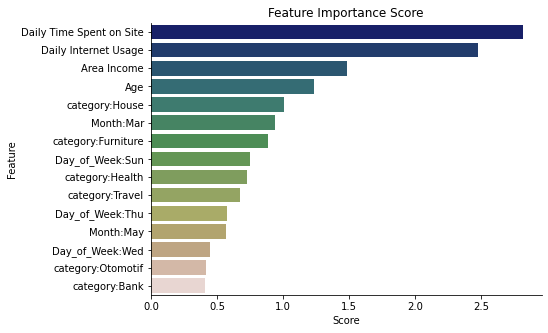

In [67]:
show_feature_importance(model_lr_sc)

In [69]:
show_best_hyperparameter(model_lr_sc, model_lr_sc.get_params())

Best C: 1.0
Best class_weight: None
Best dual: False
Best fit_intercept: True
Best intercept_scaling: 1
Best l1_ratio: None
Best max_iter: 1000
Best multi_class: auto
Best n_jobs: None
Best penalty: l2
Best random_state: 0
Best solver: lbfgs
Best tol: 0.0001
Best verbose: 0
Best warm_start: False


In [ ]:
!pip install shap

In [72]:
explainer = shap.Explainer(model_lr_sc.predict, X_val_sc)
shap_values = explainer(X_val_sc)

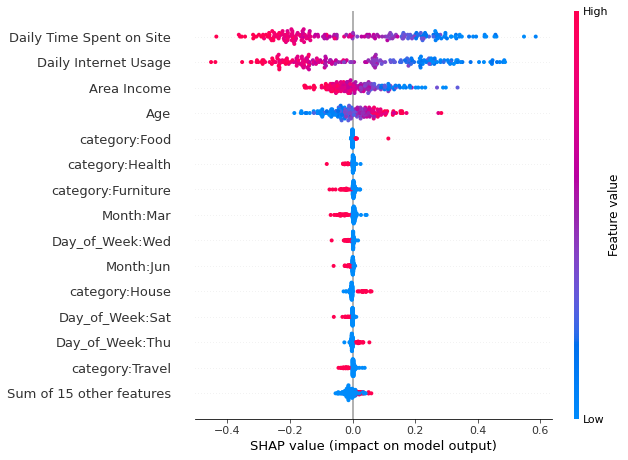

In [81]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0), max_display=15)

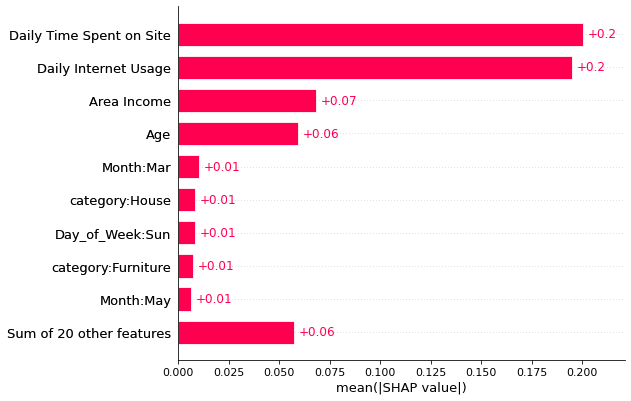

In [83]:
shap.plots.bar(shap_values)

## Analysis

In [68]:
df2 = df.filter(['Daily Time Spent on Site', 'Age', 'Area Income',
                 'Daily Internet Usage', 'Clicked on Ad'])
df2.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,432837300.0,256.09,0


### Daily Time Spent on Site

In [69]:
q1 = df2['Daily Time Spent on Site'].quantile(0.25)
q3 = df2['Daily Time Spent on Site'].quantile(0.75)
q2 = df2['Daily Time Spent on Site'].quantile(0.5)
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
up_lim = q3 + 1.5*iqr
min = df2['Daily Time Spent on Site'].min()
max = df2['Daily Time Spent on Site'].max()  

low_lim, min, q1, q2, q3, up_lim, max

(11.333750000000016,
 32.6,
 51.545,
 68.11,
 78.35249999999999,
 118.56374999999997,
 91.43)

In [70]:
# bin Daily Time Spent on Site based on quantiles
group_names = ['32 - 52','53 - 68','69 - 78','79 - 91']
df2['Daily Time Spent Group'] = pd.cut(df2['Daily Time Spent on Site'], 
                                     [min, q1, q2, q3, max], 
                                     labels=group_names)

In [71]:
data_grouped = df2.groupby(['Clicked on Ad', 'Daily Time Spent Group'])['Daily Time Spent on Site'].count().reset_index()
click_pct = pd.pivot_table(data_grouped,
                            index=['Daily Time Spent Group'],
                            columns='Clicked on Ad',
                            values='Daily Time Spent on Site').reset_index()
click_pct.columns = ['Daily Time Spent Group', 'is_not_clicked', 'is_clicked']
click_pct['% clicked'] = round(click_pct['is_clicked'] / (click_pct['is_not_clicked'] + click_pct['is_clicked'])*100,2)
click_pct

,Daily Time Spent Group,is_not_clicked,is_clicked,% clicked
0,32 - 52,2,246,99.19
1,53 - 68,71,186,72.37
2,69 - 78,199,44,18.11
3,79 - 91,228,22,8.80


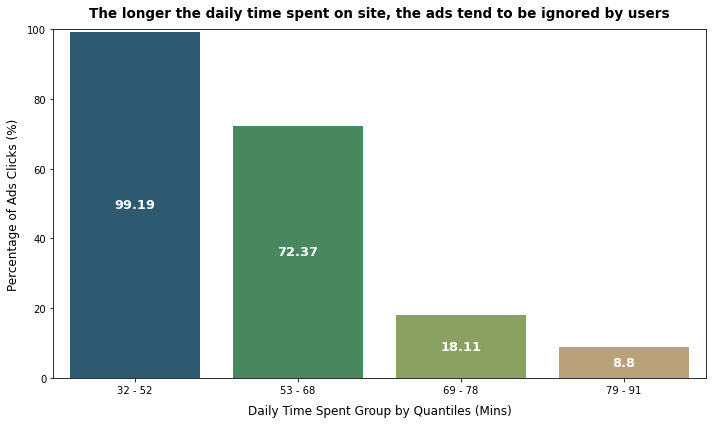

In [72]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Daily Time Spent Group', 
                 y='% clicked', 
                 data=click_pct,
                 palette='gist_earth')
plt.ylim(0,100)
plt.xlabel('Daily Time Spent Group by Quantiles (Mins)', labelpad=9, fontsize=12)
plt.ylabel('Percentage of Ads Clicks (%)', labelpad=7, fontsize=12)
plt.bar_label(ax.containers[0], 
              label_type='center',
              color='white', 
              fontweight='bold',
              fontsize=13)

plt.title('The longer the daily time spent on site, the ads tend to be ignored by users', fontsize=13.5,
         fontweight='bold',loc='center', pad=12)

plt.tight_layout()
#plt.savefig('Daily Time Spent Group on Percentage of Ads Clicks.png')

### Daily Internet Usage

In [73]:
q1 = df2['Daily Internet Usage'].quantile(0.25)
q3 = df2['Daily Internet Usage'].quantile(0.75)
q2 = df2['Daily Internet Usage'].quantile(0.5)
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
up_lim = q3 + 1.5*iqr
min = df2['Daily Internet Usage'].min()
max = df2['Daily Internet Usage'].max() 

low_lim, min, q1, q2, q3, up_lim, max

(20.11250000000004, 104.78, 139.0175, 182.65, 218.2875, 337.1925, 267.01)

In [74]:
# bin Age based on quantiles
group_names = ['105 - 139','140 - 183','184 - 218','219 - 267']
df2['Daily Internet Usage Group'] = pd.cut(df2['Daily Internet Usage'], 
                                            [min, q1, q2, q3, max], 
                                            labels=group_names)

In [75]:
data_grouped = df2.groupby(['Clicked on Ad', 'Daily Internet Usage Group'])['Daily Time Spent on Site'].count().reset_index()
click_pct = pd.pivot_table(data_grouped,
                            index=['Daily Internet Usage Group'],
                            columns='Clicked on Ad',
                            values='Daily Time Spent on Site').reset_index()
click_pct.columns = ['Daily Internet Usage Group', 'is_not_clicked', 'is_clicked']
click_pct['% clicked'] = round(click_pct['is_clicked'] / (click_pct['is_not_clicked'] + click_pct['is_clicked'])*100,2)
click_pct

,Daily Internet Usage Group,is_not_clicked,is_clicked,% clicked
0,105 - 139,0,249,100.00
1,140 - 183,57,199,77.73
2,184 - 218,207,37,15.16
3,219 - 267,236,14,5.60


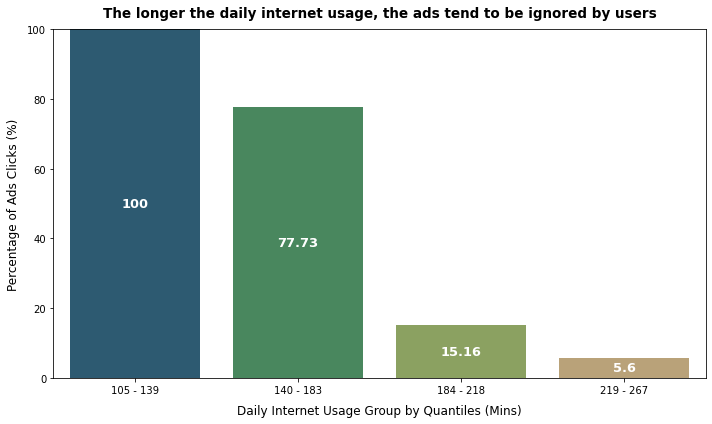

In [76]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Daily Internet Usage Group', 
                 y='% clicked', 
                 data=click_pct,
                 palette='gist_earth')
plt.ylim(0,100)
plt.xlabel('Daily Internet Usage Group by Quantiles (Mins)', labelpad=9, fontsize=12)
plt.ylabel('Percentage of Ads Clicks (%)', labelpad=7, fontsize=12)
plt.bar_label(ax.containers[0], 
              label_type='center',
              color='white', 
              fontweight='bold',
              fontsize=13)

plt.title('The longer the daily internet usage, the ads tend to be ignored by users', fontsize=13.5,
         fontweight='bold',loc='center', pad=12)

plt.tight_layout()
#plt.savefig('Daily Internet Usage Group on Percentage of Ads Clicks.png')

### Area Income

In [77]:
q1 = df2['Area Income'].quantile(0.25)
q3 = df2['Area Income'].quantile(0.75)
q2 = df2['Area Income'].quantile(0.5)
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
up_lim = q3 + 1.5*iqr
min = df2['Area Income'].min()
max = df2['Area Income'].max() 

low_lim, min, q1, q2, q3, up_lim, max

(139510525.0,
 97975500.0,
 329820137.5,
 399068320.0,
 456693212.5,
 647002825.0,
 556393600.0)

In [78]:
# bin Age based on quantiles
group_names = ['98 - 330','331 - 399','400 - 457','458 - 556']
df2['Area Income Group'] = pd.cut(df2['Area Income'], 
                          [min, q1, q2, q3, max], 
                          labels=group_names)

In [79]:
data_grouped = df2.groupby(['Clicked on Ad', 'Area Income Group'])['Daily Time Spent on Site'].count().reset_index()
click_pct = pd.pivot_table(data_grouped,
                            index=['Area Income Group'],
                            columns='Clicked on Ad',
                            values='Daily Time Spent on Site').reset_index()
click_pct.columns = ['Area Income Group', 'is_not_clicked', 'is_clicked']
click_pct['% clicked'] = round(click_pct['is_clicked'] / (click_pct['is_not_clicked'] + click_pct['is_clicked'])*100,2)
click_pct

,Area Income Group,is_not_clicked,is_clicked,% clicked
0,98 - 330,36,213,85.54
1,331 - 399,115,142,55.25
2,400 - 457,166,77,31.69
3,458 - 556,183,67,26.80


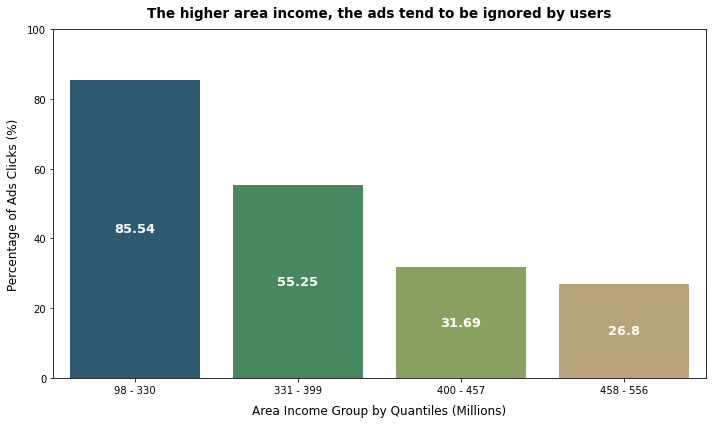

In [80]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Area Income Group', 
                 y='% clicked', 
                 data=click_pct,
                 palette='gist_earth')
plt.ylim(0,100)
plt.xlabel('Area Income Group by Quantiles (Millions)', labelpad=9, fontsize=12)
plt.ylabel('Percentage of Ads Clicks (%)', labelpad=7, fontsize=12)
plt.bar_label(ax.containers[0], 
              label_type='center',
              color='white', 
              fontweight='bold',
              fontsize=13)

plt.title('The higher area income, the ads tend to be ignored by users', fontsize=13.5,
         fontweight='bold',loc='center', pad=12)

plt.tight_layout()
#plt.savefig('Area Income Group on Percentage of Ads Clicks.png')

### Age

In [81]:
q1 = df2['Age'].quantile(0.25)
q3 = df2['Age'].quantile(0.75)
q2 = df2['Age'].quantile(0.5)
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
up_lim = q3 + 1.5*iqr
min = df2['Age'].min()
max = df2['Age'].max() 

low_lim, min, q1, q2, q3, up_lim, max

(9.5, 19, 29.0, 35.0, 42.0, 61.5, 61)

In [82]:
# bin Age based on quantiles
group_names = ['19 - 29','30 - 35','36 - 42','43 - 61']
df2['Age Group'] = pd.cut(df2['Age'], 
                          [min, q1, q2, q3, max], 
                          labels=group_names)

In [83]:
data_grouped = df2.groupby(['Clicked on Ad', 'Age Group'])['Daily Time Spent on Site'].count().reset_index()
click_pct = pd.pivot_table(data_grouped,
                            index=['Age Group'],
                            columns='Clicked on Ad',
                            values='Daily Time Spent on Site').reset_index()
click_pct.columns = ['Age Group', 'is_not_clicked', 'is_clicked']
click_pct['% clicked'] = round(click_pct['is_clicked'] / (click_pct['is_not_clicked'] + click_pct['is_clicked'])*100,2)
click_pct

,Age Group,is_not_clicked,is_clicked,% clicked
0,19 - 29,194,64,24.81
1,30 - 35,171,87,33.72
2,36 - 42,104,143,57.89
3,43 - 61,26,205,88.74


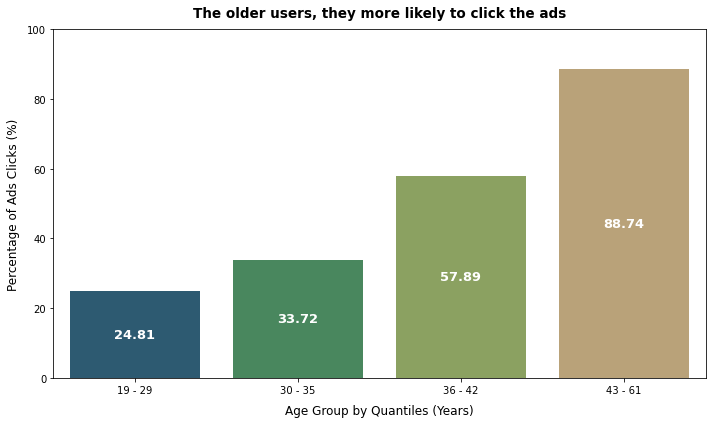

In [84]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Age Group', 
                 y='% clicked', 
                 data=click_pct,
                 palette='gist_earth')
plt.ylim(0,100)
plt.xlabel('Age Group by Quantiles (Years)', labelpad=9, fontsize=12)
plt.ylabel('Percentage of Ads Clicks (%)', labelpad=7, fontsize=12)
plt.bar_label(ax.containers[0], 
              label_type='center',
              color='white', 
              fontweight='bold',
              fontsize=13)

plt.title('The older users, they more likely to click the ads', fontsize=13.5,
         fontweight='bold',loc='center', pad=12)

plt.tight_layout()
#plt.savefig('Age Group on Percentage of Ads Clicks.png')

In [85]:
df2.sample(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,Daily Time Spent Group,Daily Internet Usage Group,Area Income Group,Age Group
405,81.58,41,388357340.0,248.16,0,79 - 91,219 - 267,331 - 399,36 - 42


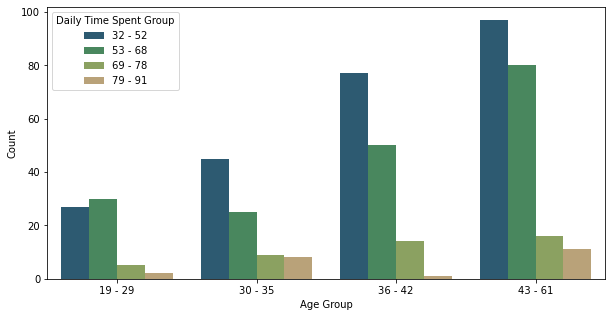

In [110]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age Group',
              hue='Daily Time Spent Group',
              data=df2[df2['Clicked on Ad']==1], 
              palette='gist_earth')
ngklik iklan Kesehatan\nSedangkan user yang berusia pra-pensiun paling banyak mnegklik iklan Otomotif')
plt.ylabel('Count')
plt.legend(title='Daily Time Spent Group', loc='upper left')
plt.show()

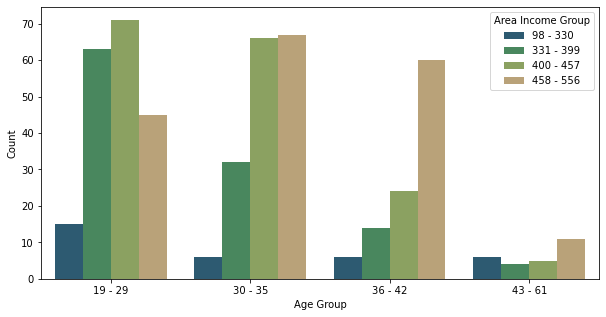

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age Group', 
              hue='Area Income Group',
              data=df2[df2['Clicked on Ad']==0], 
              palette='gist_earth')

plt.ylabel('Count')
plt.legend(title='Area Income Group', bbox_to_anchor=(1,1))
plt.show()

<Figure size 720x360 with 0 Axes>

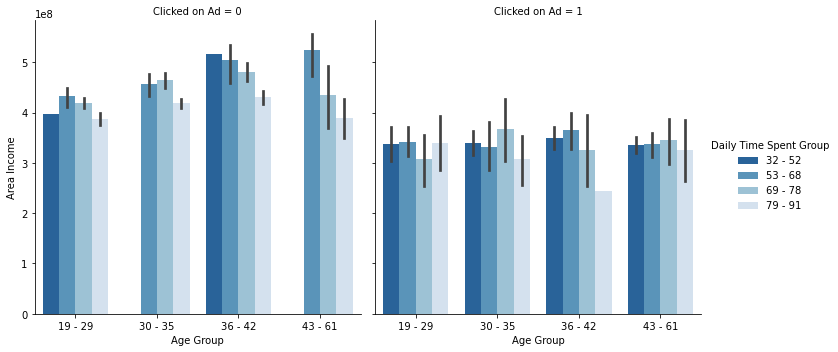

In [105]:
plt.figure(figsize=(10,5))
fig = sns.catplot(x = 'Age Group',
            y = 'Area Income', 
            hue = 'Daily Time Spent Group', 
            col = 'Clicked on Ad', 
            kind = 'bar', palette = 'Blues_r',
            data = df2)
fig.set_xticklabels(rotation=0, horizontalalignment='center')
plt.show()

<Figure size 720x360 with 0 Axes>

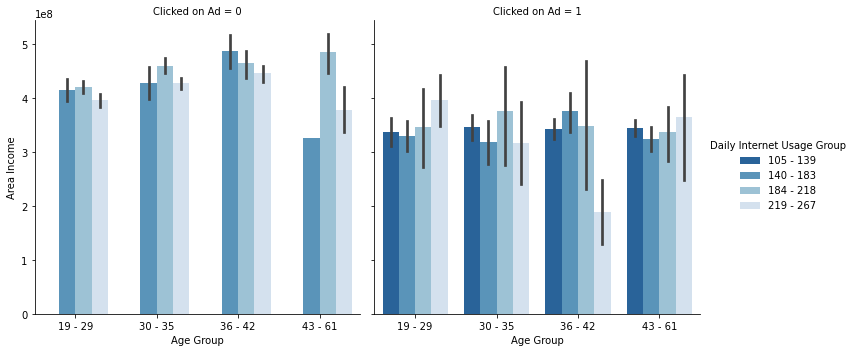

In [106]:
plt.figure(figsize=(10,5))
fig = sns.catplot(x = 'Age Group',
            y = 'Area Income', 
            hue = 'Daily Internet Usage Group', 
            col = 'Clicked on Ad', 
            kind = 'bar', palette = 'Blues_r',
            data = df2)
fig.set_xticklabels(rotation=0, horizontalalignment='center')
plt.show()